## WEEK 2 

In [ ]:
# goal 7/5 9am-1pm :  company names = match with = parent compay —> get a string match 



In [3]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib
from matplotlib import pyplot as plt
pd.set_option('display.max_columns',None)
import seaborn as sns
from shapely.geometry import Point, Polygon
import math
import plotly.express as px
from thefuzz import fuzz
from thefuzz import process

/opt/tljh/user/lib/python3.9/site-packages/thefuzz/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [7]:
stores_2022 = pd.read_csv('/srv/data/my_shared_data_folder/rafi/2022_Business_Academic_QCQ_grocery.csv')
stores_2022.drop(['Unnamed: 0'],inplace=True,axis=1)
territories = ['PR', 'FM', 'MP', 'GU', 'VI', 'MH']
stores_2022 = stores_2022.drop(stores_2022[stores_2022['STATE'].isin(territories)].index)
stores_2022.head()

,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
0,GOMART,55 POSTAL PLZ,MORGANTOWN,WV,26508,7005.0,61.0,304,2,C,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,554110.0,ALTERNATIVE FUELS,NaN,NaN,NaN,NaN,NaN,NaN,2022,21303.0,13.0,2482.0,2,NaN,NaN,NaN,NaN,998372387,NaN,124929449.0,50.0,389500.0,E,I,998372387.0,NaN,7,11000.0,3.0,39.594376,-79.954437,P,34060.0,2.0,390.0,54061.0
1,7-ELEVEN,485 E MAIN ST,EL CENTRO,CA,92243,2619.0,25.0,760,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,6.0,1273.0,2,W,NaN,NaN,NaN,495660326,NaN,5863311.0,800.0,1272634.0,H,K,495660326.0,NaN,7,11400.0,3.0,32.792679,-115.536058,0,20940.0,2.0,0.0,6025.0
2,EL SOL MARKET,110 W MAIN ST,WESTMORLAND,CA,92281,NaN,25.0,760,2,B,C,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,5.0,1061.0,9,NaN,NaN,NaN,NaN,519605455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,10200.0,1.0,33.051800,-115.581800,X,20940.0,2.0,0.0,6025.0
3,COOL SPRINGS GROCERY,241 WILDWOOD ST,MORGANTOWN,WV,26505,3141.0,61.0,304,2,A,A,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,2.0,382.0,9,NaN,NaN,NaN,NaN,817953730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7,10400.0,4.0,39.652885,-79.986398,P,34060.0,2.0,390.0,54061.0
4,CIRCLE K,123 E MAIN ST,WESTMORLAND,CA,92281,NaN,25.0,760,2,B,C,541103,CONVENIENCE STORES,44512001.0,CONVENIENCE STORES,554101.0,SERVICE STATIONS-GASOLINE & OIL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,6.0,1273.0,2,F,NaN,NaN,NaN,855113817,NaN,450720289.0,650.0,4981020.0,H,J,NaN,NaN,3,10200.0,1.0,33.051800,-115.581800,X,20940.0,2.0,0.0,6025.0


In [ ]:
stores_2022.count()


In [ ]:
#grocery_sic['COMPANY'] = grocery_sic['COMPANY'].apply(lambda x: x.split()[0])

#grocery_sic['Parent Company ASC'] = 'Walmart Co '
#grocery_sic

testone = ['Ahold Delhaize'] 
input_list= stores_2022['COMPANY']

matches = [] 
for item in testone: 
    for result in process.extract(item,input_list,limit=10):
        store = result [0]
        score = result [1]
        if score >= 77 and store not in matches: 
            matches.append(store)
            
print (matches) 

# Walmart = 'WALMART GROCERY PICKUP', 'WALMART GROCERY PKUP-DELIVERY'
# costco = COSTCO DELI
# kroger = KROGER
# Ahold Delhaize = 'AHOLD DELHAIZE USA', 'AHOLD', 'EL', 
# ,'AHOLD DELHAIZE USA INC', 'A & A', 'H & H', 'STOP-SHOP AHOLD AIS GIANT L', 'L & L', 'AHOLD USA'

In [6]:
stores_2022['COMPANY'] = stores_2022['COMPANY'].apply(lambda x: x.split()[0])

stores_2022['Parent Company ASC'] = 'Walmart Co'

AttributeError: 'float' object has no attribute 'split'

In [ ]:
# Define the names to filter
walmart_affiliated = ['Asda','Jet','Massmart','Bare necessities',
'Vudu','Equate','Moosejaw','Eloquii','ModCloth','Flipkart','Sams Club','Parcel']

# Build a dictionary to store the filtered names and their corresponding data
filtered_data = {}
for index, company  in df.iterrows():
    if company['Name'] in desired_names:
        filtered_data[row['Name']] = {'Age': row['Age'], 'City': row['City']}

# Create an updated DataFrame from the filtered dictionary
updated_df = pd.DataFrame.from_dict(filtered_data, orient='index')

print(updated_df)


# albertsons = [
"Acme Markets",
"Albertsons",
"Albertsons Market",
"Amigos",
"Andronico's",
"Balducci's",
"Carrs",
"Haggen",
"Jewel-Osco",
"Kings Food Markets",
"Lucky",
"Market Street",
"Pak 'n Save",
"Pavilions",
"Randalls"
"Safewa",
"Shaw's",
"Star Market",
"Tom Thumb",
"United Supermarkets",
"Vons",
"Buttrey Food and Drug",
"Max Food and Drug",
"Max Foods",
"Skagg's Albertsons"
"Super Saver"
]

#Kroger = [
"Baker's",
"City Market",
"Dillons",
"Food 4 Less",
"Foods Co.",
"Fred Meyer",
"Fry's",
"Gerbes",
"Harris Teeter",
"JayC",
"King Soopers",
"Kroger",
"Mariano's",
"Metro Market",
"Pay Less",
"Pick 'n Save",
"QFC",
"Ralphs",
"Ruler Foods",
"Smith's"
]








In [ ]:
# Albertsons owned supermarkets/companies
albertsons= ["Acme Markets",
    "Albertsons",
    "Albertsons Market",
    "Amigos",
    "Andronico's",
    "Balducci's",
    "Carrs",
    "Haggen",
    "Jewel-Osco",
    "Kings Food Markets",
    "Lucky",
    "Market Street",
    "Pak 'n Save",
    "Pavilions",
    "Randalls",
    "Safewa",
    "Shaw's",
    "Star Market",
    "Tom Thumb",
    "United Supermarkets",
    "Vons",
    "Buttrey Food and Drug",
    "Max Food and Drug",
    "Max Foods",
    "Skagg's Albertsons",
    "Super Saver",] 
parent = albertsons
companies = stores_2022["COMPANY"]
matches = []
for item in parent:
    for result in process.extract(item, companies, limit=len(parent)):
        store = result[0]
        score = result[1]
        if score >= 77 and store not in matches:
            matches.append(store)
print(matches)

In [ ]:
'ACME MARKETS', 
'ALBERTSONS', 
'ALBERTSONS MARKET', 
'2 AMIGOS',  
'AMIGOS UNITED', 
'LOS AMIGOS MARKET', 
'LOS AMIGOS SUPERMARKET', 
"ANDRONICO'S COMMUNITY MARKETS",
'CARRS/SAFEWAY', 
'CARRS SAFEWAY', 
'HAGGEN',
'HAGGEN FOOD & PHARMACY', 
'HAGGEN FOOD',
'JEWEL-OSCO', 
'KINGS FOOD MARKETS',
'KINGS FOOD MARKET', 
'MARKET STREET',
"PAK 'N SAVE", 
'PAVILIONS', 
'RANDALLS', 
'SAFEWAY', 
'STAR MARKET', 
'TOM THUMB', 
'UNITED SUPERMARKETS', 
'VONS', 
'MAX FOODS', 
'MAXI FOODS',
'SUPER SAVER',
'SUPER SAVE',  
'SUPER SAVER COST PLUS',
'CARRS QUALITY CTR PALMER SHPG'
 "SAAR'S SUPER SAVER FOODS"




In [8]:
stores_2022.loc[stores_2022['COMPANY'] == "AMIGOS MKT LOS"]

,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE
25723,AMIGOS MKT LOS,4201 UNIVERSITY AVE,SAN DIEGO,CA,92105,1502.0,73.0,619,2,A,B,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,3.0,814.0,9,NaN,NaN,NaN,NaN,672146081,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2402.0,1.0,32.749399,-117.10426,P,41740.0,2.0,0.0,6073.0


In [46]:
#Generated String Matches from above
#String matched brands owned by Walmart:
walmart_string = ["WALMART GROCERY PICKUP", "WALMART GROCERY PKUP-DELIVERY", "SAM’S CLUB DELI"]
#String matched brands owned by Ahold Delhaize:
ahold_string = [‘BOTTOM DOLLAR’, ‘DOLLAR DOLLAR’, ‘FOOD’, ‘FOOD 4 LESS’, ‘FOOD LION’, ‘FRESH DIRECT’, ‘REC’, ‘FRESH’, ‘H & H’, ‘S & S’, ‘FRESHII’, ‘GIANT’, ‘GIANT EAGLE’, ‘GIANT EAGLE FLORAL’, ‘GIANT FOOD’, ‘HANNAFORD’, ‘STOP & SHOP’, ‘PEA POD’, ‘BFRESH MARKET’, ‘REFRESH’, ‘EASTSIDE MARKETPLACE’, ‘WESTSIDE MARKETPLACE’, ‘MARKET’, ‘E MARKET’, ‘MARKETPLACE’]
#String matched brands owned by Kroger:
kroger_string = [“BAKER’S”, ‘S & S’, ‘BAKERS’, “BAKER’S GAS & WELD SUPLS INC”, “BAKER’S GAS”, “BAKER’S MARKET”, “BAKER’S PRO FARM LLC”, ‘BAKER STREET MARKET’, “BAKER’S KWIK SHOP”, ‘CITY MARKET’, ‘DILLONS’, ‘FOOD 4 LESS’, ‘FOODS CO’, ‘FRED MEYER’, “FRY’S FOOD”, ‘GERBES SUPER MARKET’, ‘GERBES SUPER MARKETS’, ‘GE’, ‘GERBES SUPERMARKET’, ‘HARRIS TEETER’, ‘JAYC’, “JAYCEE’S”, ‘JAYCON’, ‘CITY-RALEIGH-JAYCEE PARK-CMNTY’, ‘JAYCE MINIMARKET’, ‘NAY & JAY’, ‘KING SOOPERS’, ‘KROGER’, “MARIANO’S”, ‘METRO MARKET’, ‘METRO MINI MARKET’, ‘MARKET MARKET’, ‘PAY LESS LIQUORS’, ‘PAY LESS SUPER MARKETS’, ‘PAY LESS GAS & FOOD’, ‘PAY LESS IGA’, ‘FOOD FOR LESS’, ‘FAR LESS FOOD MARKET’, ‘MORE FOR LESS’, ‘PRICE LESS FOODS’, ‘COST LESS FOODS CO’, “PICK’N SAVE”, ‘QFC’, ‘RALPHS’, ‘RULER FOODS’, “SMITH’S”]
#String matched brands owned by Costco
costco_string = [“COSTCO DELI”]
#String matched brands owned by Albertsons
albertsons_string = [‘ACME MARKETS’, ‘ALBERTSONS’, ‘ALBERTSONS MARKET’, ‘MARKET MARKET’, ‘MARKET’, ‘2 AMIGOS’, ‘AMIGO’, ‘LOS AMIGOS DISTRIBUTING’, ‘DOS AMIGOS MARKET’, ‘3 AMIGOS BEER WINE-FOOD STORE’, ‘THREE AMIGOS’, ‘AMIGOS FOOD MART’, ‘LOS AMIGOS’, ‘AMIGOS MKT LOS’, ‘AMIGOS MARKET 7’, ‘TIENDA LOS AMIGOS’, ‘AMIGOS CONVENIENCE STORE’, ‘LOS AMIGOS UNO’, ‘AMIGOS LATIN GROCERY’, ‘AMIGOS UNITED’, ‘AMIGOS FOOD MART LLC’, ‘LOS AMIGOS MARKET’, ‘LOS AMIGOS SUPERMARKET’, ‘ICO’, “ANDRONICO’S COMMUNITY MARKETS”, “KRAUSZER’S FOOD STORE”, “CASEY’S”, “MR T’S”, “SEVEN’S”, “PATTY’S PANTRY & DELI”, “CASHION’S QUIK STOP”, ‘E C F S SNACKS LLC’, “MICKEY’S T-MART INC”, “STATLER’S COUNTRY MART”, “MIKE’S CONVENIENCE”, “BELL’S ROWLESBURG GROCERY”, “SOCCORSI’S GROCERY & SUBS”, ‘CC’, “BALDUCCI’S FOOD LOVER’S MARKET”, “DANIEL’S MARKET”, “GRILLO’S MARKET”, ‘S & G CONVENIENCE MART’, “NANCY’S FOODMART”, “MILLER’S MARKETS”, “MAYNARD’S OF FLANDREAU”, “SKIP’S”, “HARDESTY’S EXPRESS MART LLC”, “KASSAR’S FOOD & GIFTS”, “JERRY’S MARKET & LIQUOR”, “SHELLY’S GROCERY & BAKERY LLC”, ‘CARRS/SAFEWAY’, ‘CARRS SAFEWAY’, ‘CARRS QUALITY CTR PALMER SHPG’, ‘BIG CHEAP CASH & CARR’, ‘C & B USED CARS’, ‘HAGGEN’, ‘HAGGEN FOOD & PHARMACY’, ‘HAGGEN SUPPORT CTR’, ‘HAGGEN FOOD’, ‘GE’, ‘JEWEL-OSCO’, ‘KINGS FOOD MARKETS’, ‘KINGS FOOD MARKET’, “KING’S FOOD MARKET”, “KING’S FOODMARKET”, ‘KINGS FOOD MART’, ‘FOOD’, ‘LUCKY’, ‘LUCKY 3’, ‘LUCKY 7’, “LUCKY’S”, ‘LUCKY 8’, ‘LUCKYS’, ‘LUCKY SEVEN FOOD STORE’, ‘LUCKY FOOD FARMERS MARKET’, ‘LUCKY GROCERY & DELI’, ‘LUCKY DOLLAR’, ‘LUCKY CHARM CONVENIENCE STORE’, ‘LUCKY STAR MARKET LLC’, ‘LUCKY FOOD MART LLC’, ‘LUCKY MARKET’, “LUCKY’S STATION”, ‘LUCKY MARKET LLC’, “LUCKY’S SUPER MARKET”, ‘MARKET STREET’, “PAK ’N SAVE”, ‘U-SAVE FOOD STORE’, ‘GOLD LINE GRAB N GO’, ‘INDO PAK SUPERMARKET’, ‘STOP N GO FOOD MART’, ‘STOP N GO ENTERPRISES INC’, “OCALA SHOP N’ PLAY LLC”, ‘J & N MINI MART 2’, “GRAB ’N GO MART LLC”, ‘KWIK PAK FOOD MART’, “SHOP ’N SAVE EXPRESS”, ‘PIC-N-SAVE MARKET’, ‘U-SAVE TRAVEL PLAZA’, “UP NORT’ SWEET N SAVORY”, ‘STOP N SHOP WESTFIELD’, “SACK ’N SAVE FOOD”, “STOP ’N GO MARKETS OF TEXAS”, ‘CARTA N SHORE GARAGE’, ‘MASALA INDO PAK GROCERS’, ‘IN N OUT FOOD & GAS LLC’, “GAS ‘N’ GO FOOD & BEVERAGE”, ‘N A M C COMMUNITY MARKET INC’, ‘PAVILIONS’, ‘RANDALLS’, ‘SAFEWAY’, ‘S & S’, “SHAW’S SUPERMARKET”, “SHAW’S SUPERMARKETS INC”, ‘STAR MARKET’, ‘TOM THUMB’, ‘UNITED SUPERMARKETS’, ‘VONS’, ‘FOOD 4 LESS’, ‘FOOD MART’, ‘FOOD LION’, ‘HERA FOOD MART’, ‘FOOD TOWN’, ‘FOOD FAIR’, ‘OHM FOOD MART’, “D’S FOOD STORE”, ‘FOOD EXPRESS’, ‘E Z FOOD MART’, ‘JR FOOD MART’, ‘EXPRESS FOOD’, ‘MR FOOD MART’, ‘CITGO CONVENIENT FOOD MART’, ‘GREEN ACRES HEALTH FOOD STORE’, ‘FRIENDSHIP FOOD STORES INC’, ‘VERISTAS AFRICAN FOOD STORE’, ‘ILLINOIS VALLEY FOOD & DELI’, “FRY’S FOOD”, ‘FOOD CITY’, ‘MAX FOODS’, ‘MAXI FOODS’, ‘FOODS’, ‘FOOD MAX’, ‘SUPER ONE FOODS’, ‘SUNSHINE FOODS’, ‘JAMBOREE FOODS’, ‘DAY STAR FOODS’, “SULLIVAN’S FOODS”, ‘AFFILIATED FOODS CO-OP’, “JENSEN’S FINEST FOODS”, ‘EAST DAKOTAH NATURAL FOODS’, “JENSEN’S FOODS”, ‘RITE PRICE FOODS’, ‘VALLEY CENTER FOODS’, ‘SUPER SAVER’, ‘SUPER SAVE’, ‘SUPER SAVER INC’, ‘SUPER’, ‘SUPER SAVER COST PLUS’, “SAAR’S SUPER SAVER FOODS”]

SyntaxError: invalid character '‘' (U+2018) (1215492856.py, line 5)

In [14]:
#Cleaned lists from the string matches of supermarkets/companies actually owned by the parent coprporation
#***NOTE***There will be a margin of error from this process because stores were validated through manual checks
#***NOTE***It was unrealistic to manually inspect every store generated this way so there will be supermarkets/companies that do not actually belong to the parent coporation

#KROGERS FINAL
kroger_clean = ["BAKER'S",
 'BAKERS', 
 'CITY MARKET',
 'DILLONS',
 'FOOD 4 LESS', 
 'FOODS CO', 
 'FRED MEYER', 
 "FRY'S FOOD",
 'GERBES SUPER MARKET',  
 'GERBES SUPER MARKETS', 
 'GERBES SUPERMARKET', 
 'HARRIS TEETER', 
 'JAYC', 
 'KING SOOPERS',
 'KROGER',
 "MARIANO'S",
 'METRO MARKET', 
 'PAY LESS SUPER MARKETS',
 "PICK'N SAVE", 
 'QFC', 
 'RALPHS', 
 'RULER FOODS', 
 "SMITH'S"]

#Ahold Delhaize FINAL:
ahold_clean = ['BOTTOM DOLLAR',
 'FOOD LION',
 'GIANT',
 'GIANT EAGLE',
 'GIANT FOOD',
 'HANNAFORD',
 'STOP & SHOP',
 'PEA POD',
 'BFRESH MARKET',
 'EASTSIDE MARKETPLACE']

#WALMART FINAL:
walmart_clean = ['WALMART GROCERY PICKUP',
 'WALMART GROCERY PKUP-DELIVERY', 
 "SAM'S CLUB DELI"]

#COSTCO FINAL:
costco_clean = ["COSTCO DELI"]

#ALBERTSONS FINAL:
albertsons_clean = ['ACME MARKETS',
'ALBERTSONS',
'ALBERTSONS MARKET',
'2 AMIGOS',
'AMIGOS UNITED',
'LOS AMIGOS MARKET',
'LOS AMIGOS SUPERMARKET',
"ANDRONICO'S COMMUNITY MARKETS",
'CARRS/SAFEWAY',
'CARRS SAFEWAY',
'HAGGEN',
'HAGGEN FOOD & PHARMACY',
'HAGGEN FOOD',
'JEWEL-OSCO',
'KINGS FOOD MARKETS',
'KINGS FOOD MARKET',
'MARKET STREET',
"PAK 'N SAVE",
'PAVILIONS',
'RANDALLS',
'SAFEWAY',
'STAR MARKET',
'TOM THUMB',
'UNITED SUPERMARKETS',
'VONS',
'MAX FOODS',
'MAXI FOODS',
'SUPER SAVER',
'SUPER SAVE',
'SUPER SAVER COST PLUS',
'CARRS QUALITY CTR PALMER SHPG',
 "SAAR'S SUPER SAVER FOODS"]



In [15]:
#Records the removed values from the string matching for each store
#"Removed" list can be used to see the values we chose to remove from the string match
kroger_removed = [value for value in kroger_string if value not in kroger_clean]
ahold_removed = [value for value in ahold_string if value not in ahold_clean]
walmart_removed = [value for value in walmart_string if value not in walmart_clean]
costco_removed = [value for value in costco_string if value not in costco_clean]
albertsons_removed = [value for value in albertsons_string if value not in albertsons_string]

In [16]:
def parent_name(row):
    '''Creates a new column called "PARENT NAME" based on the cleaned string match list''' 
    '''The new column generalizes individual companies into their parent coporation (ie. Walmart, Krogers, etc.)''' 
    companies = row['COMPANY']  
    
    if companies in walmart_clean:
        return 'WALMART'
    if companies in costco_clean:
        return 'COSTCO'
    if companies in ahold_clean:
        return 'AHOLD'
    if companies in kroger_clean:
        return 'KROGER'
    if companies in albertsons_clean:
        return 'ALBERTSONS'

stores_2022['PARENT NAME'] = stores_2022.apply(parent_name, axis=1)

In [39]:
#Locate the unique primary sic codes present within the supermarkets/companies owned by the parent corporations of interest
#These unique primary SIC codes will be used as the basis of how we filter the main dataset to include only relevant supermarkets/companies (ie. removing convenient stores)

#Step 1: Filter a dataframe based on parent coporations
parent_companies = ['WALMART', 'COSTCO', 'KROGER', 'AHOLD','ALBERTSONS']
filtered_df = stores_2022[stores_2022['PARENT NAME'].isin(parent_companies)]

# Step 3: Get the unique PRIMARY SIC CODES values
unique_sic_codes = primary_sic_codes.unique()

# Print the unique PRIMARY SIC CODES
unique_sic_codes = np.delete(unique_sic_codes,(np.where(unique_sic_codes == 541103)))

# Print the unique PRIMARY SIC CODES
print(unique_sic_codes)

[541105 541110]


In [40]:
def sic_filter(df):
    """
    Filters the dataframe to keep only the stores with specific primary SIC codes,
    including NaN values. SIC codes are from the parent corporation's subsidiary's Primary SIC codes

    The function takes in an unfiltered dataframe as a parameter.
    The function returns a filtered dataframe.
    """
    sic_codes = unique_sic_codes
    filtered_df = df[df['PRIMARY SIC CODE'].isin(sic_codes) | df['PRIMARY SIC CODE'].isna()]
    return filtered_df

supermarkets_2022 = sic_filter(stores_2022)

random_sample = supermarkets_2022.sample(n=10, replace=False)
random_sample

,COMPANY,ADDRESS LINE 1,CITY,STATE,ZIPCODE,ZIP4,COUNTY CODE,AREA CODE,IDCODE,LOCATION EMPLOYEE SIZE CODE,LOCATION SALES VOLUME CODE,PRIMARY SIC CODE,SIC6_DESCRIPTIONS,PRIMARY NAICS CODE,NAICS8 DESCRIPTIONS,SIC CODE,SIC6_DESCRIPTIONS (SIC),SIC CODE 1,SIC6_DESCRIPTIONS (SIC1),SIC CODE 2,SIC6_DESCRIPTIONS(SIC2),SIC CODE 3,SIC6_DESCRIPTIONS(SIC3),SIC CODE 4,SIC6_DESCRIPTIONS(SIC4),ARCHIVE VERSION YEAR,YELLOW PAGE CODE,EMPLOYEE SIZE (5) - LOCATION,SALES VOLUME (9) - LOCATION,BUSINESS STATUS CODE,INDUSTRY SPECIFIC FIRST BYTE,YEAR ESTABLISHED,OFFICE SIZE CODE,COMPANY HOLDING STATUS,ABI,SUBSIDIARY NUMBER,PARENT NUMBER,PARENT ACTUAL EMPLOYEE SIZE,PARENT ACTUAL SALES VOLUME,PARENT EMPLOYEE SIZE CODE,PARENT SALES VOLUME CODE,SITE NUMBER,ADDRESS TYPE INDICATOR,POPULATION CODE,CENSUS TRACT,CENSUS BLOCK,LATITUDE,LONGITUDE,MATCH CODE,CBSA CODE,CBSA LEVEL,CSA CODE,FIPS CODE,PARENT NAME
28340,OCOENA DELI GROCERY CORP,1331 SENECA AVE,BRONX,NY,10474,4611.0,5.0,718,2,A,A,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,2.0,412.0,9,NaN,NaN,NaN,NaN,403233678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,11502.0,1.0,40.819325,-73.886462,P,35620.0,2.0,408.0,36005.0,None
24287,IGLOBAL FOOD LLC,13813 FOULGER SQ,WOODBRIDGE,VA,22192,4253.0,153.0,703,2,A,B,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,3.0,803.0,9,NaN,NaN,NaN,NaN,241417807,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,900403.0,1.0,38.655003,-77.303760,P,47900.0,2.0,548.0,51153.0,None
64861,CORONA MARKETPLACE,3919 111TH ST,CORONA,NY,11368,2636.0,81.0,718,2,A,B,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,581212.0,CATERERS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,82251.0,2.0,501.0,9,NaN,NaN,NaN,NaN,433869666,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,40100.0,2.0,40.752210,-73.855959,P,35620.0,2.0,408.0,36081.0,None
110821,WALMART GROCERY PICKUP,1621 E HARDING ST,MORRILTON,AR,72110,4505.0,29.0,501,2,A,B,541110,GROCERY PICKUP-CURBSIDE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,NaN,3.0,588.0,2,H,2019.0,NaN,NaN,743527613,632353488.0,5889993.0,11000.0,572754000.0,K,K,908037583.0,NaN,6,950300.0,1.0,35.168951,-92.726137,P,0.0,NaN,0.0,5029.0,WALMART
36627,GIANT EAGLE,3050 W 117TH ST,CLEVELAND,OH,44111,1645.0,35.0,216,2,F,G,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,599201.0,FLORISTS-RETAIL,205198.0,BREAD/OTHER BAKERY PROD-EX COOKIES,581212.0,CATERERS,591205.0,PHARMACIES,NaN,NaN,2022,39106.0,145.0,29760.0,2,S,NaN,NaN,NaN,677336323,NaN,6829915.0,1300.0,389500.0,I,I,677336323.0,NaN,7,123501.0,2.0,41.469000,-81.769000,P,17460.0,2.0,184.0,39035.0,AHOLD
23854,CRANBERRY COUNTRY MARKET,9941 STATE HIGHWAY 173,TOMAH,WI,54660,7535.0,81.0,608,2,B,B,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,39106.0,5.0,782.0,9,NaN,NaN,NaN,NaN,715128275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,950100.0,4.0,44.030575,-90.413612,P,0.0,NaN,0.0,55081.0,None
59906,BRYN MAR IGA #550,129 LAKE AVE,YONKERS,NY,10703,2709.0,119.0,914,2,D,E,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2022,82251.0,27.0,6405.0,2,L,NaN,NaN,NaN,700097623,248856791.0,885216069.0,100.0,39305256.0,F,K,NaN,NaN,7,803.0,3.0,40.947214,-73.886751,P,35620.0,2.0,408.0,36119.0,None
155677,WALMART NEIGHBORHOOD MARKET,10781 TOEPPERWEIN RD,CONVERSE,TX,78109,2561.0,29.0,210,2,E,F,541105,GROCERS-RETAIL,44511003.0,SUPERMARKETS/OTHER GROCERY (EXC CONVENIENCE) STRS,591205.0,PHARMACIES,531102.0,DEPARTMENT STORES,523107.0,PAINT-RETAIL,526104.0,GARDEN CENTERS,531104.0,RETAIL SHOPS,2022,NaN,65.0,15829.0,2,ï¿½,2016.0,NaN,NaN,720488538,632353488.0,5889993.0,11000.0,572754000.0,K,K,720488538.0,NaN,7,121501.0,3.0,29.536003,-98.333504,P,41700.0,2.0,484.0,48029.0,None
118815,SCHNUCKS,4800 N UNIVERSITY ST,PEORIA,

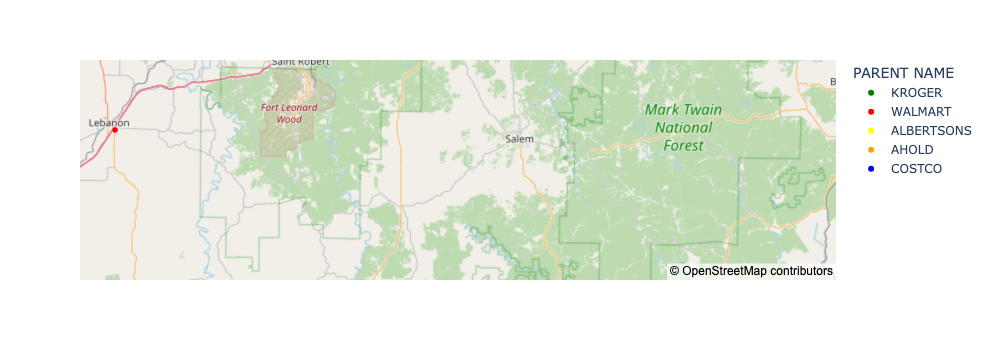

In [44]:



import plotly.express as px

#Create a scattermapbox plot
fig = px.scatter_mapbox(supermarkets_2022, lat="LATITUDE", lon="LONGITUDE", hover_data=["COMPANY"], color="PARENT NAME",
                        color_discrete_sequence=["blue", "green", "red","yellow","orange"], mapbox_style="open-street-map")

fig.show()





#import plotly.express as px

# Filter the DataFrame for a specific company
#costco = "COSTCO"
#filtered_df = supermarkets_2022[supermarkets_2022["COMPANY"] == 'COSTCO']

# Create a scattermapbox plot
#fig = px.scatter_mapbox(filtered_df, lat="LATITUDE", lon="LONGITUDE", hover_data=["COMPANY"], color="PARENT NAME",
                        #color_discrete_sequence=["blue", "green", "red", "yellow", "orange"], mapbox_style="open-street-map")

#fig.show()